<a href="https://colab.research.google.com/github/Harika822/projects/blob/master/heardisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
f_data=data.drop(['sex'],axis=1)
print(f_data.columns)

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
print(f_data.isna().sum())

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
f_data.dtypes

age           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

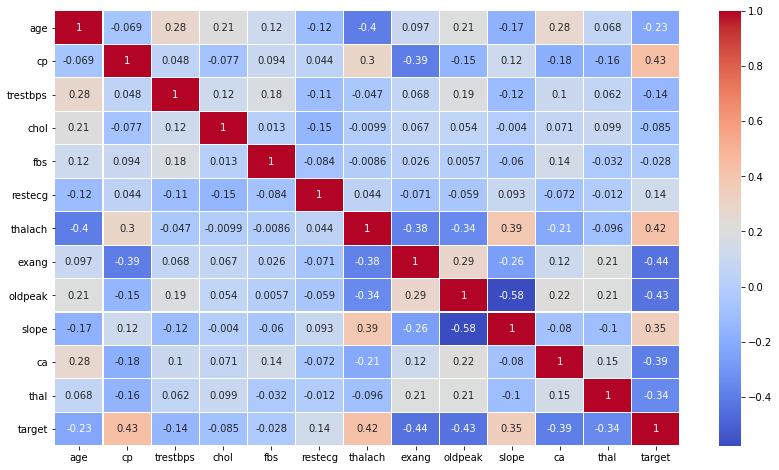

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(f_data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

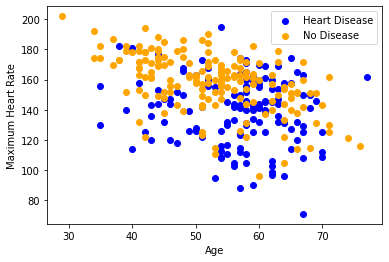

In [ ]:
plt.scatter(x=f_data.age[f_data.target==0], y=f_data.thalach[(f_data.target==0)], c="blue")
plt.scatter(x=f_data.age[f_data.target==1], y=f_data.thalach[(f_data.target==1)], c="orange")
plt.legend(["Heart Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
x=f_data.drop(['target'],axis=1).values
y=f_data.target.values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
lr = LogisticRegression(random_state=0)
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score=metrics.accuracy_score(y_test,y_pred)
print(accuracy_score)
#hyper parameter tuning
params = {'penalty':['l1','l2'],'C':[1,2,3,5,10]}
clf = GridSearchCV(lr,param_grid=params,scoring ="accuracy",cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:()'.format(clf.best_params_))


0.8157894736842105
Best Score:0.8195169082125604
Best parameter:()


In [ ]:
#similarly others mdels are used below